## Task 1
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

<BarContainer object of 18 artists>

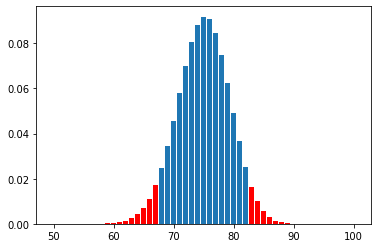

In [15]:
H0 = stats.binom(100, 0.75)
x = np.linspace(50, 100, 51)
plt.bar(x, H0.pmf(x))
plt.bar(np.linspace(50, 67, 18), H0.pmf(np.linspace(50, 67, 18)), color='red')
plt.bar(np.linspace(75 - 67 + 75, 100, 18), H0.pmf(np.linspace(75 - 67 + 75, 100, 18)), color='red')

In [18]:
print('Significance level: {:.4f}'.format(stats.binom_test(67, 100, 0.75, alternative = 'two-sided')))

Significance level: 0.0822


## Task 2
Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

* (+) Сотрудники чрезмерно оптимистично отвечали на вопрос, потому что опрос не был анонимным
* (+) Эта сеть менее популярна, поэтому в её ресторанах меньше поток посетителей; отсюда меньший уровень стресса у работников
* (+) Условия работы в этой сети лучше, чем в среднем
* (+) Сеть известна низкими зарплатами и большой текучкой кадров, поэтому туда идут работать люди, не склонные переживать о сохранении рабочего места

## Task 3
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [129]:
num_trees = data.shape[0]
mean_trees = num_trees/25
print('mean number of trees: {:.2f}'.format(mean_trees))

mean number of trees: 23.36


In [102]:
# Columns: ['sn', 'we']
data = np.loadtxt('pines.txt', skiprows=1)
#stats.binned_statistic_2d()
x = np.linspace(0, 200, 6)
y = np.linspace(0, 200, 6)

# Divide trees into bins

bins = stats.binned_statistic_2d(data[:,0], data[:, 1], values=1, statistic='count', bins=[x, y]).statistic

## Task 4
Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [107]:
bins.flatten()

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

In [127]:
# where ddof is difference degrees of freedom - number of parameters of 
# distribution that was estimated using dataset

result = stats.chisquare(bins.flatten(), mean_trees * np.ones(25), ddof = 0)
print(result)
print("Result statistic: {:.2f}".format(result.statistic))

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)
Result statistic: 150.59


## Task 5
Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с 25−1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K−1, где K — количество интервалов).

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?
* (+) Достигаемый уровень значимости меньше 0.05, гипотеза равномерности отвергается.
* (-) Достигаемый уровень значимости больше 0.05, гипотеза равномерности не отвергается.

